# **MÓDULO 32 - Random Florest**
## Avaliação e pontuação de vinhos 🍷 


### Contexto
A qualidade do vinho é um atributo complexo, influenciada por uma variedade de fatores físico-químicos. Parâmetros como acidez fixa e volátil, ácido cítrico, açúcar residual, cloretos, dióxido de enxofre (livre e total), densidade, pH, sulfatos e teor alcoólico desempenham papéis cruciais na determinação das características sensoriais que definem a qualidade de um vinho. A compreensão da relação entre essas características e a pontuação de qualidade, que varia de 0 a 10, é fundamental para produtores e consumidores.

### Objetivo Geral

Desenvolver um modelo de Random Forest para realizar a classificação multiclasse da qualidade de vinhos, utilizando as características físico-químicas disponíveis na base de dados, com o intuito de prever a pontuação de vinhos

### Base de dados

#### **Características dos Vinhos (Features)**

| Feature                   | Descrição                                                                 |
|---------------------------|--------------------------------------------------------------------------|
| Fixed Acidity            | Acidez fixa do vinho.                                                    |
| Volatile Acidity         | Acidez volátil do vinho.                                                 |
| Citric Acid              | Quantidade de ácido cítrico no vinho.                                    |
| Residual Sugar           | Açúcar residual presente no vinho.                                       |
| Chlorides                | Nível de cloretos no vinho.                                              |
| Free Sulfur Dioxide      | Dióxido de enxofre livre no vinho.                                       |
| Total Sulfur Dioxide     | Quantidade total de dióxido de enxofre no vinho.                         |
| Density                  | Densidade do vinho.                                                      |
| pH                       | Nível de pH do vinho.                                                    |
| Sulphates                | Quantidade de sulfatos no vinho.                                         |
| Alcohol                  | Teor alcoólico do vinho.                                                 |
| Quality| Pontuação do vinho baseada em dados sensoriais (escala de 0 a 10).  |



```markdown
🔍 **Observação:** 
```

### 1. Importação de Bibliotecas

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)


# Carregando os dados
df = pd.read_csv("/home/akel/PycharmProjects/EBAC/dados/winequality-red.csv", delimiter=',')
print(df.shape)
df

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [12]:
resume=pd.DataFrame({
    'Tipo': df.dtypes,
    'Nulos': df.isnull().sum(),
    'Mínimo': df.min(),
    'Máximo': df.max()      
})

print(resume.to_markdown())

|                      | Tipo    |   Nulos |   Mínimo |    Máximo |
|:---------------------|:--------|--------:|---------:|----------:|
| fixed acidity        | float64 |       0 |  4.6     |  15.9     |
| volatile acidity     | float64 |       0 |  0.12    |   1.58    |
| citric acid          | float64 |       0 |  0       |   1       |
| residual sugar       | float64 |       0 |  0.9     |  15.5     |
| chlorides            | float64 |       0 |  0.012   |   0.611   |
| free sulfur dioxide  | float64 |       0 |  1       |  72       |
| total sulfur dioxide | float64 |       0 |  6       | 289       |
| density              | float64 |       0 |  0.99007 |   1.00369 |
| pH                   | float64 |       0 |  2.74    |   4.01    |
| sulphates            | float64 |       0 |  0.33    |   2       |
| alcohol              | float64 |       0 |  8.4     |  14.9     |
| quality              | int64   |       0 |  3       |   8       |


```markdown

📌 O dataset possui, 1599 linhas e 12 colunas, das quais, 11 variáveis( *features*) para avaliar a qualidade dos vinhos são  numéricas ( do tipo  *float64*).Enquanto a variável quality ( *Target*) é numérica do tipo inteira.  Não há dados faltantes
```
---


In [13]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


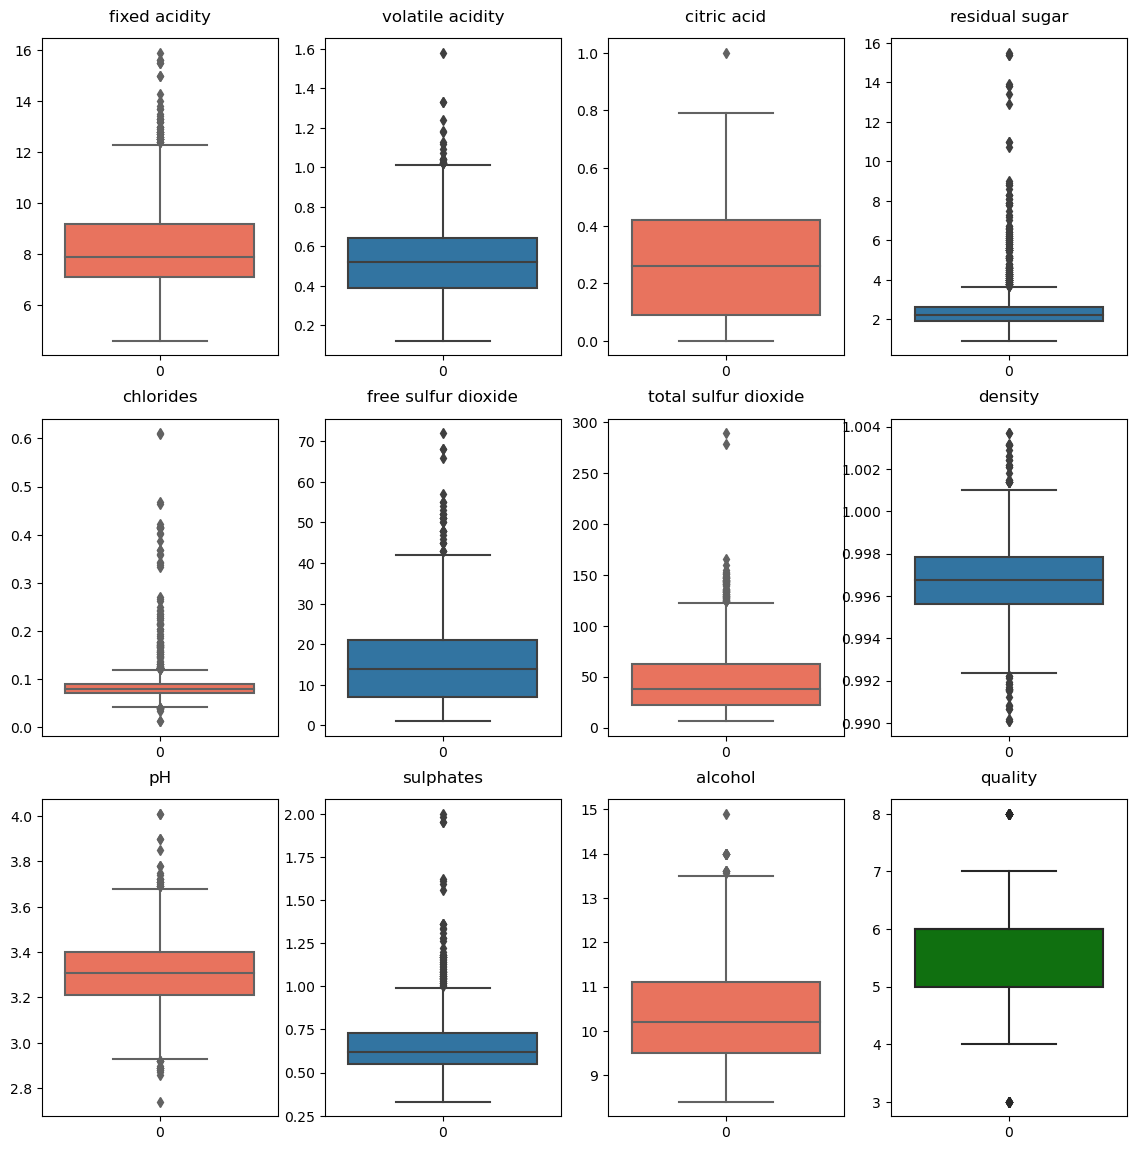

In [14]:
fig, axs = plt.subplots(3, 4, figsize=(14, 14))

sns.boxplot(data=df['fixed acidity'],color='tomato',ax=axs[0, 0])
axs[0, 0].set_title("fixed acidity", pad=12)

sns.boxplot(data=df['volatile acidity'],ax=axs[0, 1])
axs[0, 1].set_title("volatile acidity", pad=12)

sns.boxplot(data=df['citric acid'], orient='v',color='tomato',ax=axs[0, 2])
axs[0, 2].set_title("citric acid", pad=12)

sns.boxplot(data=df['residual sugar'],ax=axs[0, 3])
axs[0, 3].set_title("residual sugar", pad=12)

sns.boxplot(data=df['chlorides'],color='tomato',ax=axs[1, 0])
axs[1, 0].set_title("chlorides", pad=12)

sns.boxplot(data=df['free sulfur dioxide'],ax=axs[1, 1])
axs[1, 1].set_title("free sulfur dioxide", pad=12)

sns.boxplot(data=df['total sulfur dioxide'],color='tomato',ax=axs[1, 2])
axs[1, 2].set_title("total sulfur dioxide", pad=12)

sns.boxplot(data=df['density'],ax=axs[1, 3])
axs[1, 3].set_title("density", pad=12)

sns.boxplot(data=df['pH'],color='tomato',ax=axs[2, 0])
axs[2, 0].set_title("pH", pad=12)

sns.boxplot(data=df['sulphates'],ax=axs[2 ,1])
axs[2, 1].set_title("sulphates", pad=12)

sns.boxplot(data=df['alcohol'],color='tomato',ax=axs[2, 2])
axs[2, 2].set_title("alcohol", pad=12)

sns.boxplot(data=df['quality'],color='green',ax=axs[2,3])
axs[2, 3].set_title("quality", pad=12)
plt.show()


```markdown

📌 Com base nas informações do intervalo inquartil e dos boxplots, observamos outliers em alguma categorias. Em especial para as features *Residual Sugar*,*chlorides*, *Total Sulfur Dioxide* que apresentam valores extremos. Verificamos que os dados não seguem uma distribuição normal atráves do teste shapiro-wilk(vê anexo), o que justificou a filtragem 4.5xIQR como limiar, priorizando outliers mais extremos.
```

---


In [15]:
# filtragem via interquartil (Limar 4.5*IQR) -- priorizar remoção de outliers extremos

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR = Q3 - Q1
df2 = df[~((df < Q1-4.5*IQR) | (df > Q3+4.5*IQR)).any(axis=1)]


# Comparação estatística antes/depois
# display('Original DataFrame:')
# display(df.describe())
print("\n=== Sem Outliers ===")
display(df2.describe())

# Percentual de dados removidos
percentual_removido = (1 - len(df2) / len(df)) * 100
print(f"\nDados removidos: {percentual_removido:.2f}%")



=== Sem Outliers ===


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000
mean,8.306957,0.528134,0.262415,2.332876,0.080813,15.635786,45.213378,0.996663,3.318448,0.645224,10.440301,5.638127
std,1.746361,0.180308,0.191273,0.731143,0.019599,9.949300,30.938407,0.001839,0.151964,0.138809,1.052984,0.801282
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995540,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.320000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.500000,0.089000,21.000000,60.000000,0.997800,3.410000,0.720000,11.100000,6.000000
max,15.600000,1.580000,0.790000,5.700000,0.178000,57.000000,165.000000,1.003200,4.010000,1.360000,14.000000,8.000000



Dados removidos: 6.50%


```markdown
**📌 Principais Mudanças Após Remoção dos Outliers:**

**Redução do desvio padrão (std)**: Em todas as variáveis, o desvio padrão diminuiu, indicando menor dispersão dos dados.
**Redução dos valores máximos:** Os valores máximos caíram significativamente, especialmente para residual sugar, chlorides, free sulfur dioxide e total sulfur dioxide, mostrando a remoção de extremos.
**Médias e medianas pouco alteradas:** As médias e medianas mudaram pouco, sugerindo que os outliers tinham pouco impacto no centro da distribuição.
**Menor amplitude:** A diferença entre o mínimo e o máximo diminuiu, tornando o conjunto de dados mais homogêneo.

Essas alterações indicam que a remoção de outliers resultou em um conjunto de dados mais consistente e menos influenciado por valores extremos, o que pode beneficiar análises estatísticas subsequentes, como testes de normalidade ou modelagem preditiva.
```

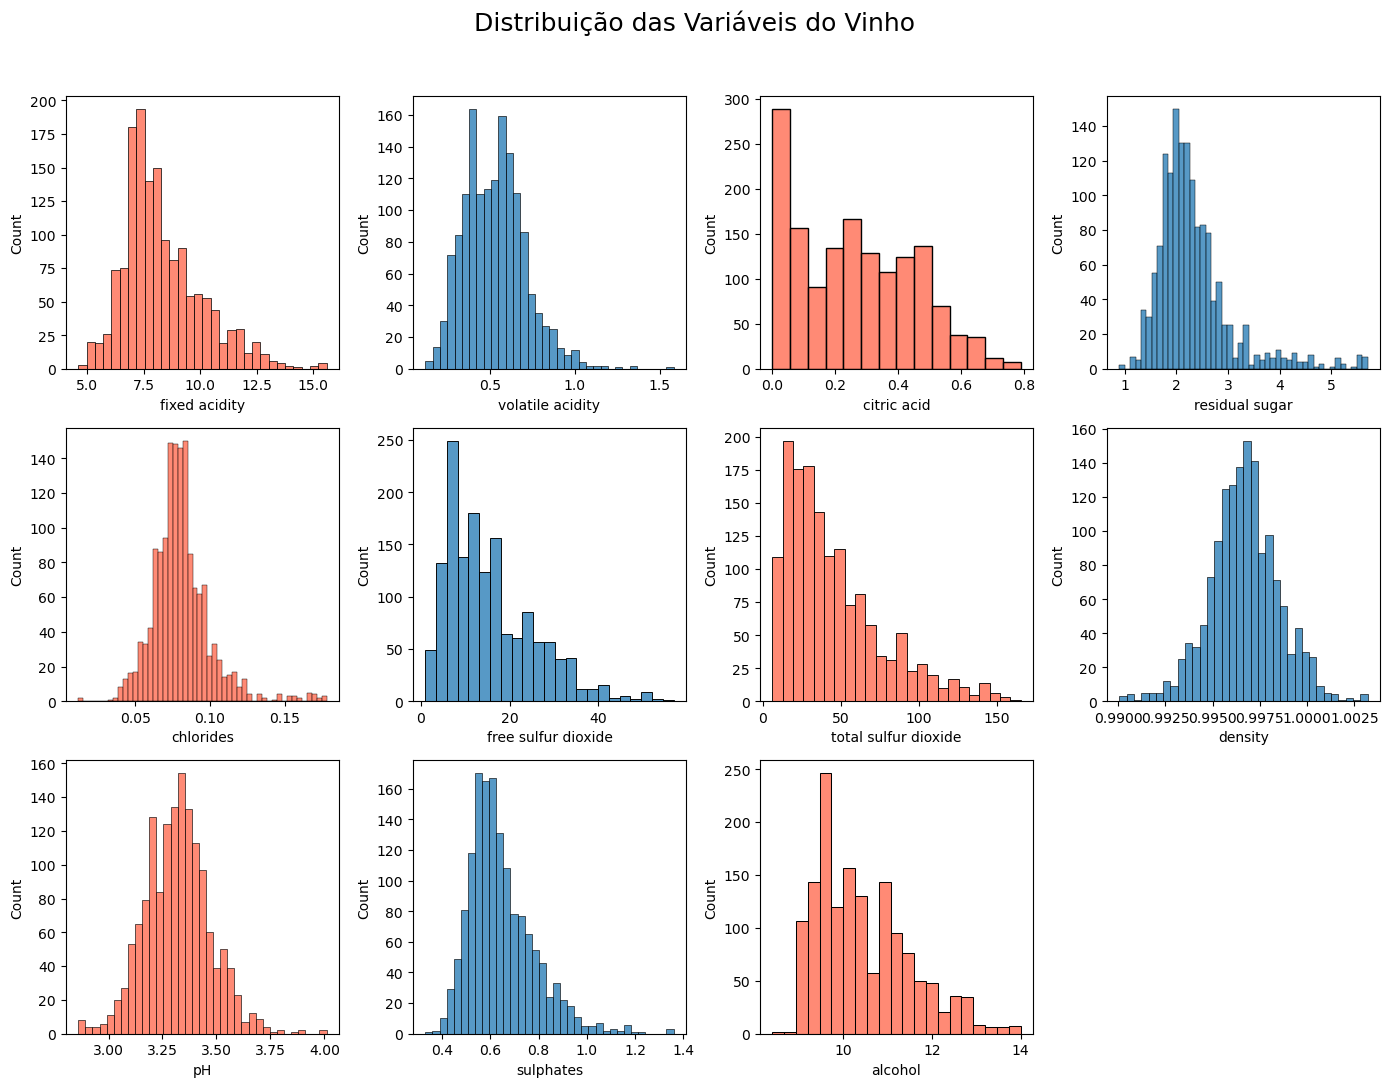

In [ ]:

# distribuição das features

fig, axs = plt.subplots(4, 4, figsize=(14, 14))
fig.suptitle('Distribuição das Variáveis do Vinho', fontsize=18)


sns.histplot(data=df2['fixed acidity'], color='tomato', ax=axs[0, 0])
sns.histplot(data=df2['volatile acidity'], ax=axs[0, 1])
sns.histplot(data=df2['citric acid'], color='tomato', ax=axs[0, 2])
sns.histplot(data=df2['residual sugar'], ax=axs[0, 3])
sns.histplot(data=df2['chlorides'], color='tomato', ax=axs[1, 0])
sns.histplot(data=df2['free sulfur dioxide'], ax=axs[1, 1])
sns.histplot(data=df2['total sulfur dioxide'], color='tomato', ax=axs[1, 2])
sns.histplot(data=df2['density'], ax=axs[1, 3])
sns.histplot(data=df2['pH'], color='tomato', ax=axs[2, 0])
sns.histplot(data=df2['sulphates'], ax=axs[2, 1])
sns.histplot(data=df2['alcohol'], color='tomato', ax=axs[2, 2])

fig.delaxes(axs[2, 3])
fig.delaxes(axs[3, 0])
fig.delaxes(axs[3, 1])
fig.delaxes(axs[3, 2])
fig.delaxes(axs[3, 3])

plt.tight_layout(rect=[0, 0, 1, 0.96])

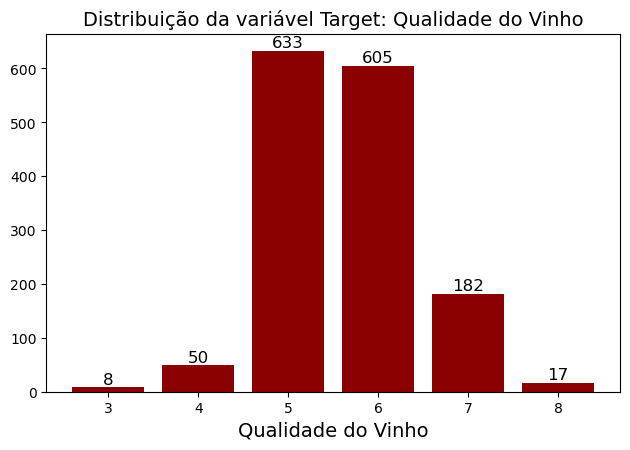

In [68]:
# Supondo que seu dataframe se chame 'df' e a coluna target seja 'Target'

plt.bar(p.index, p.values,color='darkred')
plt.title('Distribuição da variável Target: Qualidade do Vinho', fontsize=14)
plt.xlabel('Qualidade do Vinho',fontsize=14)

for i in range(len(p)):
    plt.text(p.index[i], p.values[i] , f'{p.values[i]}', ha='center', va='bottom', fontsize=12)    
plt.tight_layout(rect=[0.0, 0, 1, 0.96])


# contagem = df2['quality'].value_counts()
# print("Distribuição da variável Target:")
# print(contagem)

# # Opcional: Calcular as proporções em porcentagem
# proporcao = df2['quality'].value_counts(normalize=True) * 100

# print("\nProporção em porcentagem:")
# print(proporcao)
# p=df2['quality'].value_counts().sort_index() 



# print(p.index[0],p.values[0])
# print(p.index[1],p.values[1])
# print(p.index[2],p.values[2])
# print(p.index[3],p.values[3])
# print(p.index[4],p.values[4])

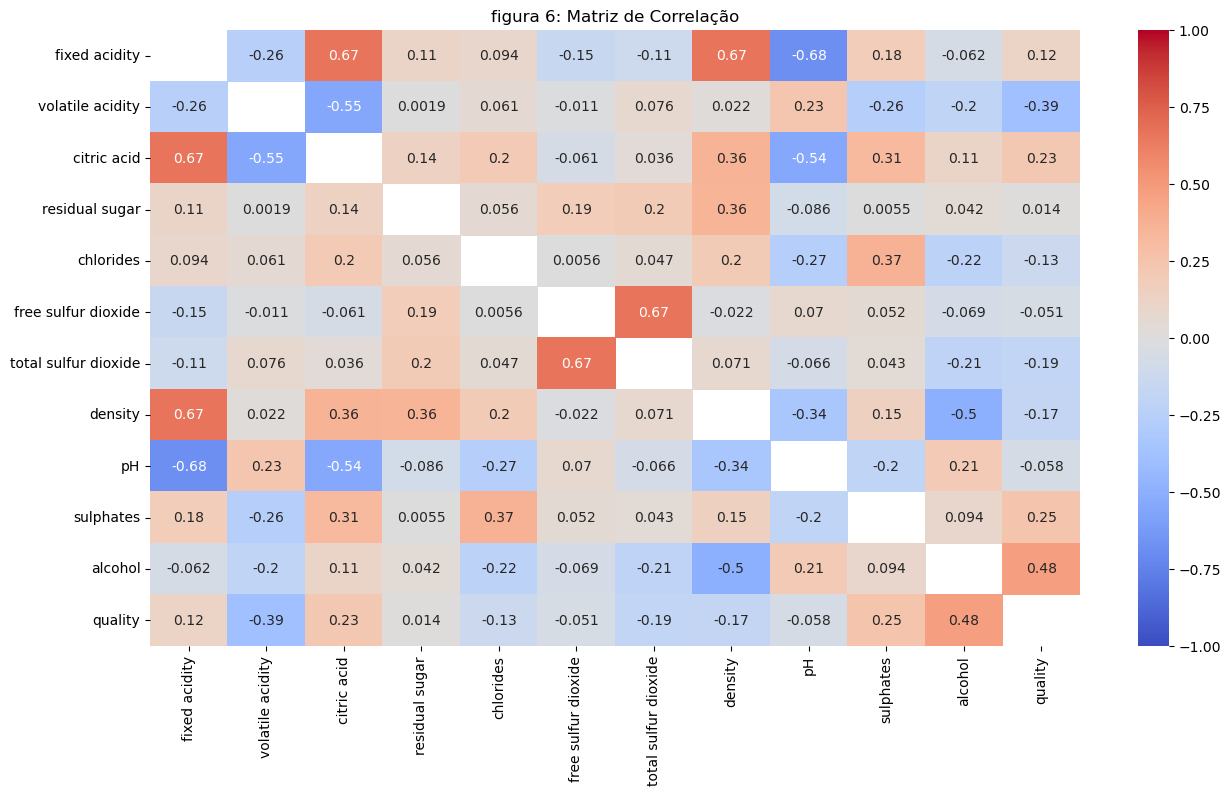

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,NaN,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,NaN,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,NaN,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,NaN,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,NaN,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,NaN,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,NaN,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,NaN,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,NaN,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,NaN,0.093595,0.251397


In [ ]:
correlation_matrix = df.corr()
# Exibir apenas valores >|0.15| & ignorar correlaca 1.
dfcm=correlation_matrix
#df2[(df2 < 0.35)&(df2 > -0.30)] = pd.NA
dfcm[dfcm >=0.99] = pd.NA

plt.figure(figsize=(15, 8))
sns.heatmap(dfcm, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('figura 6: Matriz de Correlação')
plt.show()

correlation_matrix

### 2. Análise Exploratória de Dados (EDA) e Pré-processamento I

### 3. Pré-processamento II e Preparação Final dos Dados

### 4. Modelagem


### 5. Avaliação do Modelo Base

### 6. Otimização de Hiperparâmetros

### 7. Próximos Passos e Aperfeiçoamento (Bônus)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("winequality-red.csv", delimiter=',')

df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


Esta abordagem permitirá que vocês explorem como diferentes características químicas influenciam a qualidade dos vinhos e como o Random Forest pode ser usado para fazer previsões precisas com base nesses dados.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [ ]:
#seu código aqui

# 2 - Realize a segunda e terceita etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.

B) Verifique o balanceamento da váriavel Target.

C)  Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.

D) Crie um novo dataframe apenas com as váriaveis que parecem ter maior correlação com a target. (Negativa ou positiva)


In [ ]:
#seu código aqui

# 3 - Preparação Final dos Dados

A) Separe a base em X(Features) e Y(Target)

B) Separe a base em treino e teste.


In [ ]:
#seu código aqui

# 4 - Modelagem

A) Inicie e treine o modelo de Random Forest

B) Aplique a base de teste o modelo.


In [ ]:
#seu código aqui

# 5 - Avaliação

A) Avalie as principais métricas da Claissificação e traga insights acerca do resultado, interprete os valores achados.

B) Você nota que o modelo teve dificuldade para prever alguma classe? Se sim, acredita que tenha relação com o balanceamento dos dados? Explique.


In [ ]:
#seu código aqui

# 5 - Melhorando os Hyperparametros

A) Defina o Grid de parametros que você quer testar

B) Inicie e Treine um novo modelo utilizando o random search.

C) Avalie os resultados do modelo.

D) Você identificou melhorias no modelo após aplicar o random search? Justifique.


ps. Essa parte da atividade demorará um pouco para rodar!

In [ ]:
#seu código aqui

# 6 - Chegando a perfeição

Baseado em tudo que você já aprendeu até agora, quais outras técnicas você acredita que poderiam ser aplicadas ao modelo para melhorar ainda mais suas previsões?

# Anexo - Teste Estatistico

In [ ]:
# TESTE ESTATISTICO Kolmogorov-Smirnov
from scipy.stats import kstest,shapiro
from scipy.stats import skew, kurtosis


def teste_KS(dados):
    '''
    Hipotese nula Ho:     '''
    ks_statistic, p_valor = kstest(dados, 'norm', args=(np.mean(dados), np.std(dados)))
   # ks_statistic, p_valor = kstest(dados, 'expon') #, args=(np.mean(dados), np.std(dados)))
    assimetria = skew(dados)
    curtose = kurtosis(dados)

    print(f"Assimetria : {assimetria }")
    print(f"Curtose: {curtose}")
    print(f"Estatística KS: {ks_statistic}")
    print(f"Valor p: {p_valor}")

   
    alpha = 0.05  # Nível de significância de 5%
    if p_valor < alpha:
        print("Rejeitamos a hipótese nula: os dados NÃO seguem uma distribuição normal.")
    else:
        print("Não rejeitamos a hipótese nula: os dados seguem uma distribuição normal.")
    print('-' * 70)


def teste_SW(dados):
    '''
    Teste de Shapiro-Wilk para normalidade
    
    Hipótese nula (H0): Os dados seguem uma distribuição normal.
    '''
    # Calcula estatísticas descritivas
    assimetria = skew(dados)
    curtose = kurtosis(dados)
    
    # Executa o teste de Shapiro-Wilk
    sw_statistic, p_valor = shapiro(dados)
    
    # Exibe os resultados
    print(f"Assimetria: {assimetria:.4f}")
    print(f"Curtose: {curtose:.4f}")
    print(f"Estatística SW: {sw_statistic:.4f}")
    print(f"Valor-p: {p_valor:.4f}")
    
    # Interpretação do resultado
    alpha = 0.05
    if p_valor < alpha:
        print("Rejeitamos H0: os dados NÃO seguem distribuição normal (p < 0.05)")
    else:
        print("Não rejeitamos H0: os dados seguem distribuição normal (p ≥ 0.05)")
    print('-' * 70)    
   
#print('-' * 15+'fixed acidity'+'-' * 15)
#teste_SW(df['fixed acidity'])
#teste_KS(df['fixed acidity'])
for i in df2.columns:
    print('-' * 10 + i + '-' * 10)
    #teste_KS(df[i])
    teste_SW(df[i])
  


----------fixed acidity----------
Assimetria: 0.9818
Curtose: 1.1249
Estatística SW: 0.9420
Valor-p: 0.0000
Rejeitamos H0: os dados NÃO seguem distribuição normal (p < 0.05)
----------------------------------------------------------------------
----------volatile acidity----------
Assimetria: 0.6710
Curtose: 1.2180
Estatística SW: 0.9743
Valor-p: 0.0000
Rejeitamos H0: os dados NÃO seguem distribuição normal (p < 0.05)
----------------------------------------------------------------------
----------citric acid----------
Assimetria: 0.3180
Curtose: -0.7903
Estatística SW: 0.9553
Valor-p: 0.0000
Rejeitamos H0: os dados NÃO seguem distribuição normal (p < 0.05)
----------------------------------------------------------------------
----------residual sugar----------
Assimetria: 4.5364
Curtose: 28.5244
Estatística SW: 0.5661
Valor-p: 0.0000
Rejeitamos H0: os dados NÃO seguem distribuição normal (p < 0.05)
----------------------------------------------------------------------
----------chlori